## baseline + batchnorm with distance feature + more later dense layers

In [33]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = merge([x, dist2land_input], 'concat')
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
out = Dense(num_classes, activation='softmax')(x)

model_dense = Model(inputs=[classifier_input, dist2land_input], outputs=out)
model_dense.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.



In [34]:
model_dense.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv2d_16 (Conv2D)               (None, 50, 50, 32)    320         input_2[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D)  (None, 25, 25, 32)    0           conv2d_16[0][0]                  
____________________________________________________________________________________________________
conv2d_17 (Conv2D)               (None, 25, 25, 64)    18496       max_pooling2d_11[0][0]           
___________________________________________________________________________________________

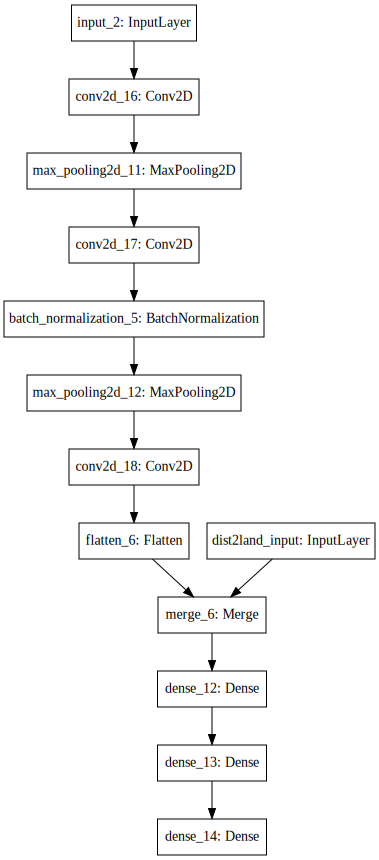

In [35]:
SVG(model_to_dot(model_dense).create(prog='dot', format='svg'))

In [37]:
lr = 0.001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 15s - loss: 0.5734 - acc: 0.8417 - val_loss: 0.2483 - val_acc: 0.9118
Epoch 2/10
1996/1996 [==============================] - 15s - loss: 0.2449 - acc: 0.9063 - val_loss: 0.3344 - val_acc: 0.8898
Epoch 3/10
1996/1996 [==============================] - 15s - loss: 0.1621 - acc: 0.9439 - val_loss: 0.2142 - val_acc: 0.9279
Epoch 4/10
1996/1996 [==============================] - 15s - loss: 0.1358 - acc: 0.9574 - val_loss: 0.2321 - val_acc: 0.9118
Epoch 5/10
1996/1996 [==============================] - 15s - loss: 0.0828 - acc: 0.9664 - val_loss: 0.1797 - val_acc: 0.9359
Epoch 6/10
1996/1996 [==============================] - 15s - loss: 0.0844 - acc: 0.9719 - val_loss: 0.2260 - val_acc: 0.9399
Epoch 7/10
1996/1996 [==============================] - 15s - loss: 0.0676 - acc: 0.9805 - val_loss: 0.2007 - val_acc: 0.9439
Epoch 8/10
1996/1996 [==============================] - 15s - loss: 0.0

In [38]:
lr = 0.001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=5,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/5
1996/1996 [==============================] - 15s - loss: 0.0313 - acc: 0.9890 - val_loss: 0.3762 - val_acc: 0.9479
Epoch 2/5
1996/1996 [==============================] - 15s - loss: 0.0206 - acc: 0.9930 - val_loss: 0.3148 - val_acc: 0.9479
Epoch 3/5
1996/1996 [==============================] - 15s - loss: 0.0403 - acc: 0.9890 - val_loss: 0.4662 - val_acc: 0.9259
Epoch 4/5
1996/1996 [==============================] - 15s - loss: 0.0275 - acc: 0.9925 - val_loss: 0.2021 - val_acc: 0.9679
Epoch 5/5
1996/1996 [==============================] - 15s - loss: 0.0084 - acc: 0.9975 - val_loss: 0.5283 - val_acc: 0.9399


In [39]:
lr = 0.0001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=5,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/5
1996/1996 [==============================] - 15s - loss: 0.0249 - acc: 0.9910 - val_loss: 0.3462 - val_acc: 0.9559
Epoch 2/5
1996/1996 [==============================] - 15s - loss: 0.0013 - acc: 0.9995 - val_loss: 0.3615 - val_acc: 0.9579
Epoch 3/5
1996/1996 [==============================] - 15s - loss: 4.3635e-04 - acc: 1.0000 - val_loss: 0.3464 - val_acc: 0.9579
Epoch 4/5
1996/1996 [==============================] - 15s - loss: 1.8558e-04 - acc: 1.0000 - val_loss: 0.3648 - val_acc: 0.9539
Epoch 5/5
1996/1996 [==============================] - 15s - loss: 3.3708e-05 - acc: 1.0000 - val_loss: 0.3672 - val_acc: 0.9599


In [40]:
lr = 0.00001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 15s - loss: 1.0542e-05 - acc: 1.0000 - val_loss: 0.3665 - val_acc: 0.9599
Epoch 2/2
1996/1996 [==============================] - 15s - loss: 1.1628e-05 - acc: 1.0000 - val_loss: 0.3693 - val_acc: 0.9599
